# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [20]:
import numpy as np
import pandas as pd
import glob
import os
from dateutil.parser import parse
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
DATA_FOLDER = '../ADA2017-Tutorials/02 - Intro to Pandas/Data' # This is the path to the Data folder containing all files for the homework

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

__SOLUTION__ <br>
__Loading and cleaning data__
We create a function that will do the work for one country. We need to do this as the column names are different depending on which country the file is from. Once we have this function we only need to call it for every one of our countries (with the corresponding names of columns and values for lines) and concatenate into one big dataframe. <br>

*Steps we do in the function* <br>
1. We load every file of the repository named after the value of "country". We use the glob library to access all the files from this repository that have the .csv extension
2. We use the columns_to_keep list to drop all the unnecessary columns of the dataframe
3. We use the lines_to_keep list to make a loop and concatenate all the interesting sub_dataframes
4. We go over the date column to keep only the month value
5. We rename the columns to have the same names regardless of the country
6. We add a column for all rows indicating the country

In [5]:
def create_df_one_country(
    country, #string of country ("guinea", "liberia", "sl")
    columns_to_keep, #array of strings of columns to keep (for guinea : ["Date", "Description", "Totals"])
    lines_to_keep): #array of value of lines to keep (for guinea : ["New cases of confirmed","New deaths registered"])
    #1
    res = pd.DataFrame()
    path = DATA_FOLDER + "/ebola/" +country+ "_data"
    allFiles = glob.glob(path + "/*.csv")
    for f in allFiles:
        df = pd.read_csv(f, index_col=None, header=0)
        res = pd.concat([res, df])
    #2
    res = res.loc[:, columns_to_keep]
    #3
    temp_dfs =[]
    for i in range(len(lines_to_keep)):
        temp_dfs.append(res.loc[res[columns_to_keep[1]] == lines_to_keep[i]])
    res = pd.concat(temp_dfs)
    #4
    res[columns_to_keep[0]] = res[columns_to_keep[0]].map(lambda x : parse(x).month)
    #5
    res = res.rename(index=str, columns =
                     {columns_to_keep[0]:"month", 
                      columns_to_keep[1]:"description", 
                      columns_to_keep[2]:"total"})
    #6
    res["country"] = country
    return res

In [6]:
guinea_df = create_df_one_country("guinea", 
                                  ["Date", "Description", "Totals"],
                                  ["New cases of confirmed","New deaths registered"])
liberia_df = create_df_one_country("liberia",
                                    ["Date","Variable","National"],
                                    ["New case/s (confirmed)","Total death/s in confirmed cases"])
sl_df = create_df_one_country("sl",
                             ["date", "variable", "National"],
                             ["new_confirmed","death_confirmed"])
ebola_df = pd.concat([guinea_df, liberia_df, sl_df])

__Line that we consider__<br>
Here is the description of what we will only take in account. We will consider only the "confirmed" cases. This choice is made to make sure that we don't take into account other sickness and don't count someone twice (for example someone counted in the probable/suspected case and later counted in the confirmed case) <br>
- *Guinea* <br>
New cases : "New cases of confirmed"<br>
Deaths : "New deaths registered" <br>
- *Liberia* <br>
New cases : "New case/s (confirmed)"<br>
Deaths : "Total death/s in confirmed cases"<br>
- *Sierra Leone* <br>
New cases : "new_confirmed"<br>
Deaths : "death_confirmed"<br>

__Note__ : If we want to consider more cases, we just have to add them in the list in the arguments when we call the create_df_one_country, you will get the average value

In [7]:
#We create a new dataframe to store the results
df1 = pd.DataFrame(columns = ['month', 'country','description'], dtype = str)
df2 = pd.DataFrame(columns = ['average'], dtype = float)
results = pd.concat([df1, df2])
#We first group the data by month
ebola_bymonth = ebola_df.groupby(ebola_df.month)
for month, data in ebola_bymonth:
    #Then we group by country
    ebola_bycountry = ebola_df.groupby(ebola_df.country)
    for country, data in ebola_bycountry:
        #We then make the difference between every case
        cases_deaths = data.groupby(data.description)
        for cat, totals in cases_deaths:
            #Now we can compute the average
            avg = np.round(totals.total.apply(pd.to_numeric).sum()/len(totals.total), 2)
            #we can finally add the line of result to our dataframe
            results.loc[len(results)] = [avg, country, cat, month]
#We reorder the columns for readability in the order of the groupings
results = results[['month', 'country', 'description','average' ]]
results

,month,country,description,average
0,6,guinea,New cases of confirmed,12.55
1,6,guinea,New deaths registered,4.14
2,6,liberia,New case/s (confirmed),176.60
3,6,liberia,Total death/s in confirmed cases,238.89
4,6,sl,death_confirmed,720.79
5,6,sl,new_confirmed,42.50
6,7,guinea,New cases of confirmed,12.55
7,7,guinea,New deaths registered,4.14
8,7,liberia,New case/s (confirmed),176.60
9,7,liberia,Total death/s in confirmed cases,238.89


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Solution

First, we want to access the path and names of all the files containing the microbiomes data:

In [8]:
path = DATA_FOLDER + "/microbiome"
xlsFiles = os.listdir(path)
# We don't want metadata.xls in our list of files
xlsFiles.remove('metadata.xls')

Then we will create a dataframe called microbiomes for the final result, create a dataframe for each excel file and merge it to the microbiomes dataframe using names of microbiomes in the different files as the common index.

In [12]:
microbiomes = pd.DataFrame()
# We use count (incremented through the loop) to give a name for each column depending of which file we got the data from
count = 1
for f in xlsFiles:
    data = pd.read_excel(path + '/' + f, sheetname = 'Sheet 1', header = None)
    data.columns = ['Name', count]
    if microbiomes.empty:
        # Accesed during the first loop only because we can't use pd.merge with an empty dataframe
        microbiomes = data
    else:
        # Use outer merge ('name' column as the merging term) with microbiomes and the actual data
        microbiomes = pd.merge(microbiomes, data, how = 'outer')
    count += 1

# Set index of microbiomes to be the 'name' column and check if the index is unique
microbiomes = microbiomes.set_index('Name')
print("Index of microbiomes dataframe is unique: %s" % microbiomes.index.is_unique)
microbiomes.head()

Index of microbiomes dataframe is unique: True


,1,2,3,4,5,6,7,8,9
Name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0,14.0,2.0,28.0,7.0,8.0,NaN,16.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0,NaN,NaN,3.0,2.0,1.0,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0,4.0,NaN,14.0,5.0,5.0,1.0,6.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0,5.0,NaN,10.0,4.0,5.0,NaN,5.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0,7.0,1.0,17.0,12.0,18.0,NaN,14.0


We import the metadata.xls in a dataframe. Each row of this this file contains the description about each column (each microbiome file) of the microbiomes dataframe. Thus we want the 9 rows of the metadata dataframe to be the column names in the microbiomes dataframe.

In [13]:
metadata = pd.read_excel(path + "/metadata.xls", sheetname = 'Sheet1')
# Replace the Nan values in metadata by unknown
metadata = metadata.fillna('unknown')
# We want all the rows information that will be used in the columns as tuples in an array:
columns = [tuple(x) for x in metadata.values]
# We set the columns in microbiomes as the ones given by the columns array
microbiomes.columns = pd.MultiIndex.from_tuples(columns)

Finally we replace all the NaN values by 'unknown' and check that we still have a unique index on the 'name' column

In [14]:
microbiomes = microbiomes.fillna('unknown')
print("Index of microbiomes dataframe is unique: %s" % microbiomes.index.is_unique)
microbiomes.head()

Index of microbiomes dataframe is unique: True


,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
,EXTRACTION CONTROL,NEC 1,Control 1,NEC 2,Control 2,NEC 1,Control 1,NEC 2,Control 2
,unknown,tissue,tissue,tissue,tissue,stool,stool,stool,stool
Name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2,unknown,unknown,3,2,1,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10,4,unknown,14,5,5,1,6
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9,5,unknown,10,4,5,unknown,5
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9,7,1,17,12,18,unknown,14


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [15]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

## SOLUTION

### Question 1. 
  - 'pclass' represents the class number of the passenger, it goes from 1 to 3, and it's an integer.  
  - 'survived' is a double that indicates if the passenger has survived the shipwreck. It's either 1 (survived) or 0 (didn't survived).  
  - 'name' is a string of characters that contains the full name of the passenger.  
  - 'sex' is stored as an integer indicating the sex of the passenger, and is either female or male. It is Categorical and you can find its map under "sex_map". 
  - 'age' is a double which represents the age of the passenger in years.  
  - 'sibsp' represents the number of siblings/spouses aboard as a double.  
  - 'parch' is the number of parents/children aboard, and it is a double.  
  - 'ticket' is the ticket number of the passenger, and is represented by a character string.  
  - 'fare' represents the passenger's fare in British Pounds, it's a double.  
  - 'cabin' is the passenger's cabin index composed of a letter and a number. It's stored as an integer.  
  - 'embarked', stored as an integer, stands for the port from where the passenger embarked. It is Categorical and you can find its map under "dock_map".  
  - 'boat' is the number of the evacuation boat to which the passenger was assigned. It's an integer.  
  - 'body' is the identification number of the passenger's body. It's a double.  
  - 'home.dest' is a character string which describe the passenger's home and destination.

In [16]:
sex_map = {'female':0, 'male':1}
dock_map = {'C':0, 'Q':1, 'S':2}

In [18]:
titanic = pd.read_excel(DATA_FOLDER+'/titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Question 2.

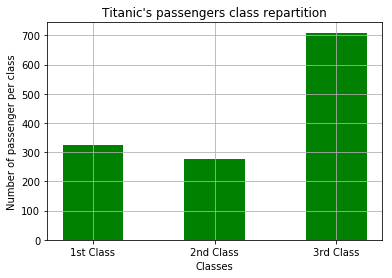

In [21]:
titanic_class = titanic['pclass'].hist(bins=[1,2,3,4], align='left', rwidth = 0.5, color = 'green')
plt.xticks(range(1,4))
plt.gca().set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Classes')
plt.ylabel('Number of passenger per class')
plt.title('Titanic\'s passengers class repartition')
plt.show()

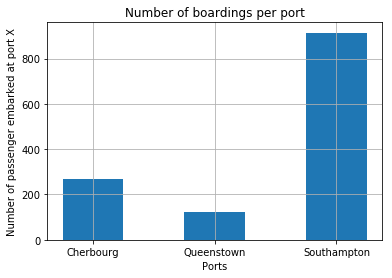

They are 2 passengers that we don't know where did they embarked.


In [22]:
mappedDocks = titanic['embarked'].map(dock_map)
titanic_docks = mappedDocks.hist(bins = range(0,4),align='left', rwidth = 0.5)
plt.xticks(range(0,3))
plt.gca().set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
plt.xlabel('Ports')
plt.ylabel('Number of passenger embarked at port X')
plt.title('Number of boardings per port' )
plt.show()
print("They are {} passengers that we don't know where did they embarked.".format(titanic['embarked'].isnull().sum()))

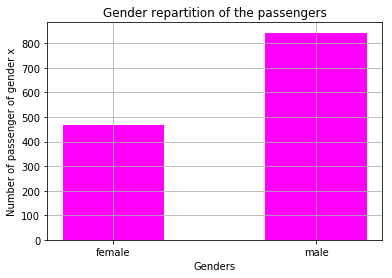

In [23]:
titanic_sex = titanic['sex'].map(sex_map).hist(bins = [0,1,2], align='left', rwidth = 0.5, color='magenta')
plt.xticks(range(0,2))
plt.gca().set_xticklabels(['female','male'])
plt.xlabel('Genders')
plt.ylabel('Number of passenger of gender x')
plt.title('Gender repartition of the passengers')
plt.show()

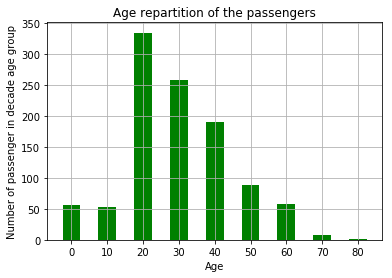

They are 263 passengers for which we don't have their age.


In [25]:
titanic['age'].round(-1).hist(bins=range(0,100,10),align='left',color = 'green', rwidth = 0.5)
plt.xticks(range(0,90,10))
plt.xlabel('Age')
plt.ylabel('Number of passenger in decade age group')
plt.title('Age repartition of the passengers')
plt.show()
print("They are {} passengers for which we don't have their age.".format(titanic['age'].isnull().sum()))

### Question 3.

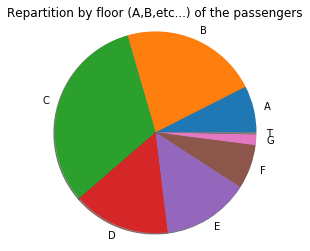

The floor 'T' is taken as existing and not as an error. Only one passenger is on this floor tho.


In [26]:
titanic_floor = titanic['cabin'].str[0]
titanic_grouped = titanic_floor.groupby(titanic['cabin'].str[0])
datas = []
categories=[]
for cat, data in titanic_grouped:
    categories.append(cat)
    datas.append(data.size)
fig1, ax1 = plt.subplots()
fig1.set_size_inches(4,4)
ax1.pie(datas, labels=categories, shadow=True, radius=2)
ax1.axis('equal')
plt.title('Repartition by floor (A,B,etc...) of the passengers')
plt.show()
print("The floor 'T' is taken as existing and not as an error. Only one passenger is on this floor tho.")

### Question 4.

In [27]:
def fill(g):
    d=[]
    for cat, data in g:
        d.append(data.size)
    return d;

def getClass(base,x):
    return base[base['pclass']==x]

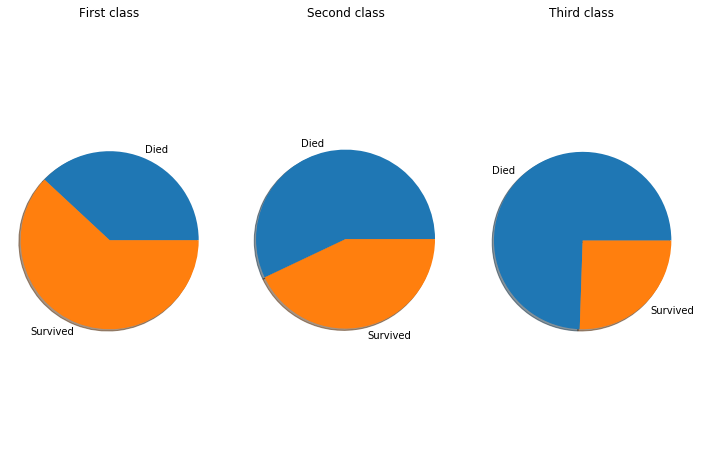

In [28]:
base4 = titanic.filter(items=['pclass', 'survived'])
firstClass4 = getClass(base4,1)['survived']
secondClass4 = getClass(base4,2)['survived']
thirdClass4 = getClass(base4,3)['survived']
grouped1 = firstClass4.groupby(titanic['survived'])
grouped2 = secondClass4.groupby(titanic['survived'])
grouped3 = thirdClass4.groupby(titanic['survived'])

categories=['Died', 'Survived']
d1 = fill(grouped1)
d2 = fill(grouped2)
d3 = fill(grouped3)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(12, 8)

ax1.pie(d1, labels=categories, shadow=True)
ax2.pie(d2, labels=categories, shadow=True)
ax3.pie(d3, labels=categories, shadow=True)
ax1.axis('equal')
ax1.set_title('First class')
ax2.axis('equal')
ax2.set_title('Second class')
ax3.axis('equal')
ax3.set_title('Third class')

plt.show()

### Question 5.

In [29]:
def sexMap(frame):
    frame['sex'] = frame['sex'].map(sex_map)
    return frame

def getSex(base,x):
    return base[base['sex']==x]

C:\Users\olivi\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\olivi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\olivi\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\olivi\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\olivi\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\olivi\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


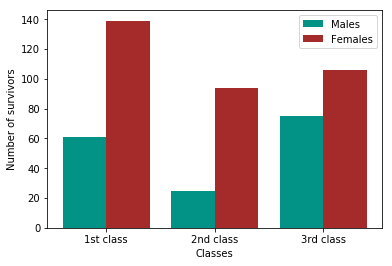

First class: 96.0% of females and 34.0% of males survived
Second class: 88.0% of females and 14.0% of males survived
Third class: 49.0% of females and 15.0% of males survived


In [30]:
base5 = sexMap(titanic.filter(items=['pclass', 'sex'])[titanic['survived']==1])
fig, axes = plt.subplots(1,1)


males = getSex(base5,1)['pclass']
females = getSex(base5,0)['pclass']

f1 = len(titanic.filter(items=['pclass','sex'])[titanic['pclass'] == 1][titanic['sex']=='female'])
f2 = len(titanic.filter(items=['pclass','sex'])[titanic['pclass'] == 2][titanic['sex']=='female'])
f3 = len(titanic.filter(items=['pclass','sex'])[titanic['pclass'] == 3][titanic['sex']=='female'])
m1 = len(titanic.filter(items=['pclass','sex'])[titanic['pclass'] == 1][titanic['sex']=='male'])
m2 = len(titanic.filter(items=['pclass','sex'])[titanic['pclass'] == 2][titanic['sex']=='male'])
m3 = len(titanic.filter(items=['pclass','sex'])[titanic['pclass'] == 3][titanic['sex']=='male'])

axes.hist([males, females],bins=range(1,5), histtype='bar', align='left', color=['xkcd:teal','brown'], label=['Males', 'Females'])
plt.xticks(range(1,4))
plt.gca().set_xticklabels(['1st class','2nd class', '3rd class'])
plt.xlabel('Classes')
plt.ylabel('Number of survivors')
plt.legend(prop={'size': 10})
plt.show()
print("First class: {}% of females and {}% of males survived".format(np.floor(len(females[females==1])*100/f1), np.floor(len(males[males==1])*100/m1)))
print("Second class: {}% of females and {}% of males survived".format(np.floor(len(females[females==2])*100/f2), np.floor(len(males[males==2])*100/m2)))
print("Third class: {}% of females and {}% of males survived".format(np.floor(len(females[females==3])*100/f3), np.floor(len(males[males==3])*100/m3)))